# Fixture Difficulty: Improved

Running this file produces the most up to date fixture difficulty ratings using a combination of GW points and team xG for and against.

Change the files at source to choose a later gameweek window e.g. gw 10 to 16, rather than current 1 to 16. 

In [1]:
import pandas as pd
import warnings
import matplotlib as plt

## Run FD_points and FD_xG analysis files

In [14]:
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Run FD_points and FD_xG analysis files (need to update gameweek parameter from the file)
%run "C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Analysis\Improved_FD_points.ipynb"

# Get fixture list
fixtures = pd.read_csv(r'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Data\2025_26\Fixtures\Schedule\Fixtures.csv')

## Combine and process

In [15]:
# Combine datasets
FD_combined = FD_points

# Rename columns
FD_combined.rename(columns = {'Difficulty_x': 'Difficulty_points','Difficulty_y':'Difficulty_xG'}, inplace = True)

# Drop non-needed columns
FD_combined.drop(columns = ['Av_GW_Points', 'z_score'], inplace= True)

## Get team information

In [16]:
# Add Team name information
FD_combined = FD_combined.sort_values(by = 'Opponent')

# All teams in order 
teams = ['Arsenal', 'Aston Villa', 'Brighton', 'Bournemouth', 'Brentford', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Leeds', 'Liverpool', 'Man City', 'Man Utd', 'Newcastle',
       'Nottingham Forest', 'Spurs', 'Sunderland', 'West Ham', 'Wolves']

# Create team column
team_col = []

# Loop through teams and add to fixture difficulty sheet 
for team in teams:
    for i in range (1, 9):
        team_col.append(team)

# Create new columns
FD_combined['Team'] = team_col

In [17]:
# Separate by position
forwards = FD_combined[FD_combined['Position'].isin(['FWD'])] # could add 'MID'
defenders = FD_combined[FD_combined['Position'].isin(['DEF'])] # could add 'GK'

In [19]:
forwards

,Opponent,Position,Difficulty,Team
0,ARS (A),FWD,5,Arsenal
1,ARS (H),FWD,5,Arsenal
2,AVL (A),FWD,5,Aston Villa
3,AVL (H),FWD,2,Aston Villa
4,BHA (A),FWD,4,Brighton
5,BHA (H),FWD,2,Brighton
6,BOU (A),FWD,5,Bournemouth
7,BOU (H),FWD,2,Bournemouth
8,BRE (A),FWD,3,Brentford
9,BRE (H),FWD,2,Brentford


## Graphs

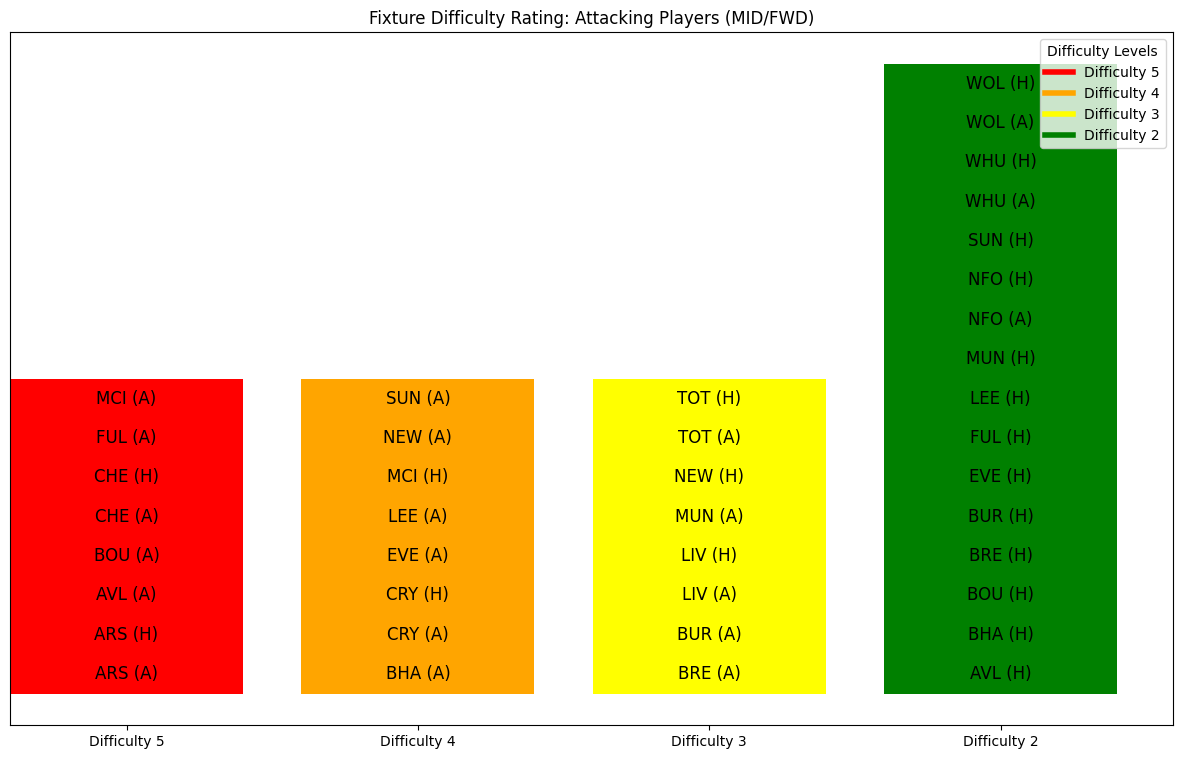

In [20]:
# Create a DataFrame from the sample data
df = pd.DataFrame(forwards)

# Group by Difficulty
grouped = df.groupby('Difficulty')['Opponent'].apply(list)

# Define colors for each difficulty level
difficulty_colors = {
    5: 'red',
    4: 'orange',
    3: 'yellow',
    2: 'green',
}

# Create the chart
fig, ax = plt.subplots(figsize=(15, 9))

# Initialize position for each difficulty level's group
x_position = 0  # Start stacking horizontally
x_positions = []  # To store the x-tick positions
x_labels = []  # To store the x-tick labels

# Iterate over grouped data to plot
for diff, opponents in grouped.items():
    # Bar height represents the number of opponents in the group
    bar_height = len(opponents)
    
    # Draw a vertical stack of opponents for this difficulty group
    ax.barh(
        y=range(bar_height),  # Position each opponent vertically
        width=0.8,  # Fixed width for all bars
        left=x_position,
        height=1,  # Uniform height for stacking
        color=difficulty_colors.get(diff, 'gray'),  # Color for the difficulty
    )
    
    # Add opponent names inside the bars
    for i, opponent in enumerate(opponents):
        ax.text(
            x=x_position + 0.4,  # Center text horizontally in the bar
            y=i,  # Vertical position
            s=opponent,
            ha='center',
            va='center',
            fontsize=12,
            color='black'  # Black text for contrast
        )
    
    # Store x-tick positions and labels
    x_positions.append(x_position + 0.4)  # Midpoint of the current bar group
    x_labels.append(f'Difficulty {diff}')  # Label for the difficulty group
    
    # Move to the next position for the next group
    x_position += 1

# Set x-ticks
ax.set_xticks(x_positions)  # Use stored x-tick positions
ax.set_xticklabels(x_labels, ha='center')  # Use stored labels, center them

# Add legend with all difficulty levels
legend_elements = [
    plt.Line2D([0], [0], color=color, lw=4, label=f'Difficulty {diff}')
    for diff, color in difficulty_colors.items()
]
ax.legend(handles=legend_elements, title="Difficulty Levels", loc='upper right')

# Add chart labels
plt.title('Fixture Difficulty Rating: Attacking Players (MID/FWD)')
plt.yticks([])  # Remove y-ticks since names are inside bars
plt.show()

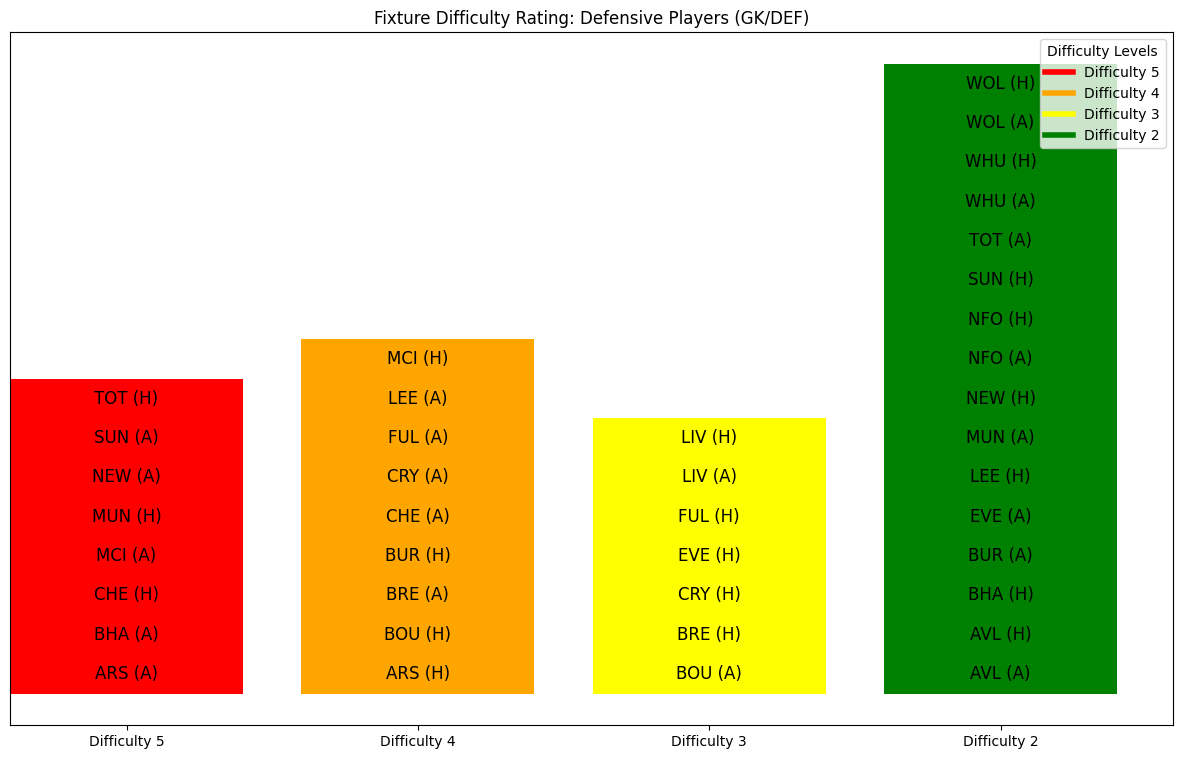

In [22]:
# Create a DataFrame from the sample data
df = pd.DataFrame(defenders)

# Group by Difficulty
grouped = df.groupby('Difficulty')['Opponent'].apply(list)

# Define colors for each difficulty level
difficulty_colors = {
    5: 'red',
    4: 'orange',
    3: 'yellow',
    2: 'green',
}

# Create the chart
fig, ax = plt.subplots(figsize=(15, 9))

# Initialize position for each difficulty level's group
x_position = 0  # Start stacking horizontally
x_positions = []  # To store the x-tick positions
x_labels = []  # To store the x-tick labels

# Iterate over grouped data to plot
for diff, opponents in grouped.items():
    # Bar height represents the number of opponents in the group
    bar_height = len(opponents)
    
    # Draw a vertical stack of opponents for this difficulty group
    ax.barh(
        y=range(bar_height),  # Position each opponent vertically
        width=0.8,  # Fixed width for all bars
        left=x_position,
        height=1,  # Uniform height for stacking
        color=difficulty_colors.get(diff, 'gray'),  # Color for the difficulty
    )
    
    # Add opponent names inside the bars
    for i, opponent in enumerate(opponents):
        ax.text(
            x=x_position + 0.4,  # Center text horizontally in the bar
            y=i,  # Vertical position
            s=opponent,
            ha='center',
            va='center',
            fontsize=12,
            color='black'  # Black text for contrast
        )
    
    # Store x-tick positions and labels
    x_positions.append(x_position + 0.4)  # Midpoint of the current bar group
    x_labels.append(f'Difficulty {diff}')  # Label for the difficulty group
    
    # Move to the next position for the next group
    x_position += 1

# Set x-ticks
ax.set_xticks(x_positions)  # Use stored x-tick positions
ax.set_xticklabels(x_labels, ha='center')  # Use stored labels, center them

# Add legend with all difficulty levels
legend_elements = [
    plt.Line2D([0], [0], color=color, lw=4, label=f'Difficulty {diff}')
    for diff, color in difficulty_colors.items()
]
ax.legend(handles=legend_elements, title="Difficulty Levels", loc='upper right')

# Add chart labels
plt.title('Fixture Difficulty Rating: Defensive Players (GK/DEF)')
plt.yticks([])  # Remove y-ticks since names are inside bars
plt.show()

In [23]:
# Export to csv
FD_combined.to_csv(r'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Data\2025_26\Fixtures\Difficulty_ratings\FD_Improved\Current_FD_Improved_update.csv')